<a href="https://colab.research.google.com/github/changyong93/TIL/blob/main/210610_OOP(%EA%B0%9D%EC%B2%B4%EC%A7%80%ED%96%A5%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 객체 지향 프로그램
- 어떤 행동에 대해 시작부터 끝까지 모든 것을 나열할 수 있지만
- 행동을 수행하는 주체들, 행동, 결과 등을 하나의 객체 단위로 구분하여 관리하는 것을 객체지향 프로그램이라고 함
- 객체 지향 프로그래밍(Ojbect-Oriented Programming, OOP)
  - 객체 : 속성(attribute)와 행동(action)을 가짐
  - OOP는 이러한 객체 개념을 프로그램으로 구현 => 속성은 변수(variable), 행동은 함수(method)
    - 파이썬은 객체지향 언어
  - OOP는 설계도에 해당하는 클래스(class)와 실제 구현체인 인스턴스(instance)로 나뉨

## 축구 선수 정보를 class로 구현

In [ ]:
#class : class 예약어, SoccerPlayer:class 이름, object: 상속받는 개체명
#단 object는 안 적어도 python3에서는 자동 상속
#클래스명은 함수와 달리 snake_case("_" 활용)을 사용하지 않고 CamelCase 방식으로 대문자를 활용하여 클래스명 지정
class SoccerPlayer(object): # == class SoccerPlayer():
  def __init__(self, name, position, back_number):
    #__init__ : 객체 초기화 예약 함수
    #self. 으로 객체의 초기 정보 설정
    #여기서 self는 생성된 instance 자신을 얘기함
    #예를 들어, 아래 hong 객체에서 self는 코드 안에선 hong 자신이 되는 것, 즉 외부에선 hong, 내부에선 self로 불림
    self.name = name
    self.position = position
    self.back_number = back_number

  def change_back_number(self, new_number):
    # print("선수의 등번호를 변경합니다 : From %d to %d" % (self.back_number, new_number))
    print(f"선수의 등번호를 변경합니다 : From {self.back_number} to {new_number}")
    self.back_number = new_number

# __init__과 유사하게 쓰이는 형태가 있는데
# __는 특수한 예약 함수나 변수 그리고 함수명 변경(맹글링)으로 사용
# ex) __main__, __add__, __str__, __eq__
# 예약 함수를 magic method라고 불리는데 이 magic method는 상당히 많음
# https://corikachu.github.io/articles/python/python-magic-method
#여기서 __str__은 예약함수로써, print문을 실행했을 경우 해당 값이 출력됨

  def __str__(self):
    return f"hello My name is {self.name}. My back number is {self.back_number}. I played in {self.position} in center."

  def __add__(self, other): #값을 더해주는 예약함수
    return self.name + other.name


In [ ]:
hong = SoccerPlayer("hong", "MF", 10)
park = SoccerPlayer("park", "MF", 19)
#여기서 test는 class에서 파생된 객체
#객체를 생성 시 init에 선언되 변수를 모두 선언해줘야 함
#단 동일한 클래스에서 여러 개체가 파생될 수 있는데, 이 객체들은 모두 다름
hong1 = SoccerPlayer("hong", "MF", 10)
print(hong is hong1)
print(hong == hong1)

#__str__ 예약 함수 사용 with print
print(hong)

#__add__ 예약 함수 사용 with +
print(hong + park)

In [ ]:
hong.change_back_number(19)

In [ ]:
#back_number를 직접적으로도 변경은 가능, 단 권장하지 않음, 이유는 나중에 설명
hong.back_number = 20
print(hong)

## 구현 가능한 OOP만들기 - 노트북
- Note를 정리하는 프로그램
- __사용자는 Note에 뭔가를 적을 수 있다__.
- Note에는 __Content__가 있고, __내용을 제거__할 수 있다.
- 두 개의 노트북을 합쳐 하나로 만들 수 있다.
- Note는 Notebook에 삽입된다.
- Notebook은 Note가 삽입 될 때 페이지를 생성하며, 최고 300페이지까지 저장 가능하다.
- 300 페이지가 넘으면 더 이상 노트를 삽입하지 못한다.

In [ ]:
class Note():
  def __init__(self, content = None):
    self.content = content

  def write_content(self, content):
    self.content = content
  
  def remove_content(self):
    self.content = ""
  
  def __add__(self, other):
    return self.content + other.content

  def __str__(self):
    return f"노트에 적힌 내용입니다: {self.content}"


In [ ]:
class NoteBook():
  def __init__(self,title):
    self.title = title
    self.page_number = 1
    self.notes = {}

  def add_note(self, note, page = 0):
    if self.page_number < 300:
      if page == 0:
        self.notes[self.page_number] = note
        self.page_number += 1
      else:
        self.notes[page] = note
        self.page_number += 1
    else:
      print("page가 모드 채워졌습니다.")
  
  def remove_note(self,page_number):
    if page_number in self.notes.keys():
      return self.notes.pop(page_number)
    else:
      print("해당 페이지는 존재하지 않습니다.")
  
  def get_number_of_pages(self):
    return len(self.notes.keys())



In [ ]:
my_notebook = NoteBook("강의 노트북")
new_note = Note("아 수업하기 싫다")
new_note_2 = Note("파이썬 강의")
print(new_note)
print(new_note_2)

In [ ]:
my_notebook.add_note(new_note,120)

In [ ]:
my_notebook.add_note(new_note_2,100)

In [ ]:
my_notebook.page_number

In [ ]:
my_notebook.notes

# OOP Characteristics
---
- inheritance(상속), polymorphism(다형성), Visibility(==hidden class, 얼마나 다른 사람이 데이터를 볼 수 있는지)

## inheritance
- 부모 클래스로부터 속성과 Method를 물려받은 자식 클래스를 생성하는 것
  - 아레 예제에서 Person 이라는 class에 name과 age라는 속성이 있는데, Korean이라는 클래스가 Person을 그대로 상속 받음
  - person : 부모클래스 , Korean 자식 클래스
  - Korean에는 아무런 기초 정보가 들어 있찌 않는데 Person을 상속받았기 때문에 Person이 가지고 있는 Method나 variable을 그대로 사용 가능
  - first_korean이라는 인스턴스를 만들면 Person의 객체를 그대로 사용 가능
  - 추가로, 자식 class는 부모 클래스에 없는 메소드를 생성해서 사용할 수도 있다
  - 자식 class에서 super라는 예약함수가 쓰이는데, 이는 부모 클래스의 메소드를 불러와서 사용하거나 불러온 것을 수정하여 사용하기 위해 사용

In [ ]:
class Person(object):
  def __init__(self, name, age):
    self.name = name
    self.age = age

class Korean(Person):
  # def __init__(self,name,age): #자식 클래스에서 새로운 속성이 없을 경우 생략 가능
    # super().__init__(name,age)
  
  def __str__(self):
    return f"제 이름은 {self.name}이고, 나이는 {self.age} 입니다"

first_korean = Korean("Hong", 35)
print(first_korean)

In [ ]:
class Person(object):
  def __init__(self, name, age, gender):
    #속성값 지정, 해당 변수 클래스의 atrribute임을 명확히 하기 위해 self로 지정
    self.name = name
    self.age = age
    self.gender = gender

  def about_me(self): #method 선언
    print(f"저의 이름은 {self.name}이구요, 제 나이는 {self.age} 입니다")

  def __str__(self):
    return f"안녕하세요. 저의 이름은 {self.name}이구요, 제 나이는 {self.age}입니다."

class Employees(Person): # 부모 클래스 Person을 상속 받음
  def __init__(self, name, age, gender, salary, hire_date):
    super().__init__(name,age,gender) #부모객체 사용
    self.salary = salary
    self.hire_date = hire_date

  def do_work(self): #새로운 method 추가
    print("열심히 일을 합시다")

  def about_me(self):
    #부모 클래스의 메소드 사용
    #단, 그대로 사용하지 않고 기능을 추가
    #print()을 추가로 입력
    super().about_me()
    print(f"제 급여는 {self.salary}원 이구요. 제 입사일은 {self.hire_date}입니다")


  

In [ ]:
mp = Person("jone",34,"Male")
mEmp = Employees("jone",34,"Male",3000,"2018/01/01")

In [ ]:
print(mp.about_me())
print(mEmp.about_me())

## Polymorphism
- 이름이 같은 메소드의 내부 로직을 다르게 작성
- Dynamic Typing 특성으로 인해 파이썬에서는 같은 부모 클래스의 상속에서 주로 발생

- 중요한 OOP 개념이나 현재는 깊이 다루지 말 것
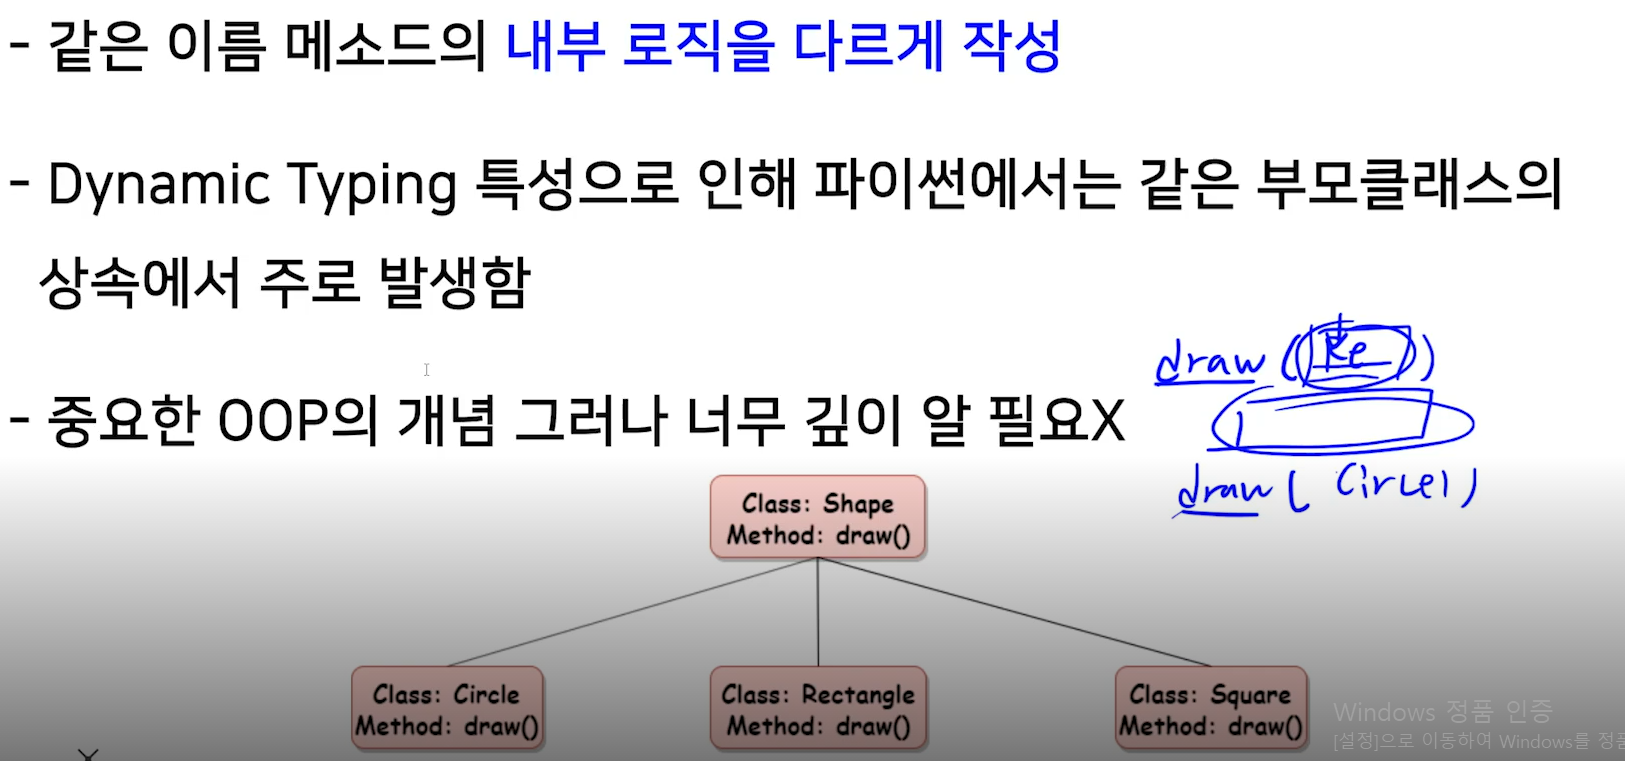

In [ ]:
class Animal:
  def __init__(self,name):
    self.name = name

  def talk(self):
    raise NotImplementedError("Subclass must implement asbstract method")


class Cat(Animal):
  def talk(self):
    return "Meow"

class Dog(Animal):
  def talk(self):
    return "Woof"

- 클래스 생성 시 ()나 (object)를 쓰지 않아도 상관없음
- 여기서 다형성 특성은, Animal이라는 부모 클래스와 자식 클래스 간 메소드 명은 동일하지만 다른 역할을 수행
- 부모 클래스의 객체를 생성할 경우 객체.talk()을 하면 에러 메세지 출력
- 자식 클래스의 객체를 생성할 경우 객체.talk()을 하면 Cat과 Dog에 따라 울음소리가 출력됨

In [ ]:
animals = [Cat("Missy"), Cat("Mr."), Dog("Lassie")]
for animal in animals:
  print(animal.name, " : ", animal.talk())

## Visibility(가시성)
- 객체의 정보를 볼 수 있는 레벨을 조정하는 것 
- __누구나 객체 안의 모든 변수를 볼 필요는 없음__
  - 1) 객체를 사용하는 사용자가 임의로 정보 수정
  - 2) 필요 없는 저보에는 접근할 필요가 없음
  - 3) 만약 제품으로 판매한다면? 소스의 보호  
  =>필요한 정보 노출을 최소화 필수 => method나 attribute를 쉽게 접근하지 못하도록 막음 => Encapsulation

[알아두면 상식] Encapsulation
- 캡슐화 또는 정보 은닉(information hiding)
- class를 설계할 때, 클래스 간 간섭/정보공유의 최소화 => 서로간 인터페이스만 알면 쉽게 해당 클래스를 사용
- 심판 클래스가 축구선수 클래스 가족 정보를 알아야 하나?
- 캡슐을 던지듯, 인터페이스만 알아서 써야함

### Visibility example 1
---
- Product 객체를 Inventory 객체에 추가
- Inventory에는 오직 Product 객체만 들어감
- Inventory에 Product가 몇 개인지 확인이 필요
- Inveotory에 Product Items는 직접 확인 불가

In [ ]:
class Product:
  pass

class Inventory:
  def __init__(self):
    self.items = [] #__를 추가할 경우 Private 변수 선언으로, 타객체가 접근 불가
    self.test = "abc"

  def add_new_item(self, product):
    if type(product) == Product:
      self.items.append(product)
      print("new item added")
    else:
      raise ValueError("Invalid Item")

  def get_number_of_item(self):
    return len(self.items)

In [ ]:
my_inventory = Inventory()
my_inventory.add_new_item(Product())
my_inventory.add_new_item(Product())
my_inventory

- 인벤토리에 add_new_item()로 Product 형태로 item 2개를 추가
- 문제는 items()가 외부에서 접근 가능하여 Product 외의 다른 형태의 클래스도 접근가능

In [ ]:
my_inventory.items.append("abc")
my_inventory.items

- 이러한 문제를 방지하기 위해 private 변수로 선언
- self.items => self.__items (맹글링)

변수명 앞에 __를 붙여서 숨겨짐 => 맹글링

---  

네임 맹글링(name mangling)이란??
- 변수/함수 이름을 짓이겨서 다른 이름으로 바꿔버리는 것을 뜻함
- 맹글링을 적용하고 싶은 변수/함수명 앞에 언더바(_) 두개를 붙여서 적용   
- 맹글링을 사용하는 경우
  - 1. 클래스의 속성값을 외부에서 접근하기 힘들게 할 때(Private화)
    => 단 완벽히 숨기는 것은 아님(아래 예시 참고)
  - 2. 하위 클래스가 상위 클래스의 속성을 오버라이딩 하는 것을 막을 때

---
tip)
- python 언더바 기능에 대한 자료
  - https://tibetsandfox.tistory.com/20
  - https://tibetsandfox.tistory.com/21

- 오버라이딩 : 상송 받은 메소드를 재정의 하는 것


In [ ]:
class Product:
  pass

class Inventory:
  def __init__(self):
    self.__items = [] #__를 추가할 경우 Private 변수 선언으로, 타객체가 접근 불가

  def add_new_item(self, product):
    if type(product) == Product:
      self.__items.append(product)
      print("new item added")
    else:
      raise ValueError("Invalid Item")

  def get_number_of_item(self):
    return len(self.__items)

In [ ]:
my_inven = Inventory()
my_inven.add_new_item(Product())
my_inven.add_new_item(Product())
my_inven.get_number_of_item()

In [ ]:
my_inven.items.append("abc")

In [ ]:
my_inven.items

맹글링으로 변수를 어느 정도 숨김. 단, my_inven를 dict화 한 후 보면 items를 볼 수 있는 다른 요소가 보임   
=> 즉, 외부의 접근을 조금 어렵게 할 뿐 값을 완벽히 보호해 주는 것은 아님

In [ ]:
print(dir(my_inven))

In [ ]:
my_inven._Inventory__items

오버라이딩도 어느 정도 막을 수 있지만 완벽히 막을 수 있는 것은 아님

In [ ]:
 
class TestClass:
    def __init__(self):
        self.name = "왕춘삼"
        self.age = 30
        self.hobby = "인형놀이"


class TestClass2(TestClass):
    def __init__(self):
        super().__init__()
        self.name = "양팔두"
        self.age = 23
        self.hobby = "벽 보기"


man = TestClass2()
print(man.name, man.age, man.hobby)

In [ ]:
class TestClass:
    def __init__(self):
        self.name = "왕춘삼"
        self.age = 30
        self.__hobby = "인형놀이"


class TestClass2(TestClass):
    def __init__(self):
        super().__init__()
        self.name = "양팔두"
        self.age = 23
        self.__hobby = "벽 보기"


man = TestClass2()
print(man.name, man.age, man.hobby)


In [ ]:
print(man.name, man.age, man._TestClass2__hobby)

### Visibility Example 2
- Product 객체를 Inventory 객체에 추가
- Inventory에는 오직 Product 객체만 들어감
- Inventory에 Product가 몇 개인지 확인이 필요
- Inveotory에 Product Items 접근 허용
---
- items를 맹글링 했더라도 우회해서 접근하는게 아닌, 접근을 허용하는 방식

In [ ]:
class Inventory(object):
  def __init__(self):
    self.__items = []

  @property #property decorator : 숨겨진 변수를 반환하게 해줌, 함수명을 변수명 처럼 사용하게 해줌
  def items(self):
    return self.__items.copy() # 값으 수정하더라도 원본 객체에 영향을 주지 않기 위해 카피

  # def items(self):
  #   return self.__items

  def add_new_item(self,product):
    if type(product) == Product:
      self.__items.append(product)
      print("new item added")
    else:
      raise ValueError("Invalid Item")
      
  def get_number_of_item(self):
    return len(self.__items)

In [ ]:
my_inventory = Inventory()
my_inventory.add_new_item(Product())
my_inventory.add_new_item(Product())
print(my_inventory.get_number_of_item())

In [ ]:
my_inventory.__items

기존에 사용하던 방식으로는 맹글링된 변수명은 호출 불가. 단, property로 인해 함수명을 변수명처럼 사용 가능하게 함

In [ ]:
my_inventory.items

property 데코를 했을 때 return self.__items로 할 경우, 불러 왔을 때 값을 추가하면 원본 객체도 수정되니 보통 카피까지 붙여서 사용

In [ ]:
items = my_inventory.items

In [ ]:
items.append("abc")

In [ ]:
print("객체 데코로 가져온 items에 임의의 다른 형태의 데이터를 입력 후 개수 확인\n","초기 객체의 items 개수: ",my_inventory.get_number_of_item(),"\n 객체의 데코로 가져온 items 개수: ", len(items))

### decorator
- first-class objects
- inner function
- decorator

#### first-class objects
  - 일등 함수 또는 일등 객체
  - 변수나 데이터 구조에 할당 가능한 객체
  - parameter로 전달이 가능 + 리턴 값으로 사용   
  => 즉 파이썬의 모든 함수는 1급 함수
    - ex) map(fx, 변수)에서 함수 fx도 파라미터로 사용

In [ ]:
def square(x): return x*x
def cube(x): return x*x*x

def formula(method, argument_list):
  return [method(value) for value in argument_list]
#함수가 어떤 리턴 값이나 파라미터로 사용됨

#### inner function(내재 함수)
- 함수 내의 또 다른 함수가 존재
- closures : inner function을 return 값으로 반환
---
'Hello'값이 msg에 입력되면, printer()를 호추하게 되고, 이때 함수 내부의 printer()함수가 작동


In [ ]:
def print_msg(msg):
  def printer():
    print(msg)
  printer()

print_msg("Hello")

In [ ]:
def print_msg(msg):
  def printer():
    print(msg)
  return printer()

another = print_msg("Hello")
another

#### decorator function
- 복잡한 클로저 함수를 간다하게 만들어 줌
- 즉, 함수를 수정하지 않은 상태에서 추가 기능을 구현할 때 사용
  - ex) 아래 예문에서, printer를 실행 시 printer 함수가 star의 func으로 들어감
  - 그 후 return inner를 수행하여, inner함수에 값이 넘어가는데, *args, **kwargs로 정해놔서 msg 값이 그대로 넘어오고 순서대로 실행하여 결과가 출력
- https://dojang.io/mod/page/view.php?id=2427

In [ ]:
def star(func):
  def inner(*args, **kwargs):
    print("*"*30)
    func(*args,**kwargs)
    print("*"*30)
  return inner

@star
def printer(msg):
  print(msg)

printer("hello")

In [ ]:
def generate_power(exponent):
  def warpper(f):
    def inner(*args):
      result = f(*args)
      return exponent ** result
    return inner
  return warpper

@generate_power(2)
def raise_two(n):
  return n**2

print(raise_two(7))

raise_two의 n을 7로 선언 ->   
exp = 2인 generate_power 실행 ->   
warpper 실행 ->   
inner 실행 ->   
n = 7인 raise_two의 결과를 result에 선언 ->   
exp^result값을 inner 메소드으 return 값으로 반환 ->   
다시 이 값을 warpper의 return 값으로 반환 ->
다시 이 값을 generate_power의 return 값으로 반환